### Bagged Classifier

In [7]:
# imports
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import linear_model, datasets
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingClassifier

In [8]:
# Reads
# used various kinds of data.
# Can change the name of the file manually
X1 = pd.read_csv('Error_50k+test_may17.csv')
Y = X1['Rating']
X1 = X1.drop('Rating',1)


In [9]:
# split into training and testing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, train_size=0.8,test_size = 0.2,random_state = 10)

In [10]:
# visualize ROC curves
from sklearn.metrics import roc_curve, auc
from itertools import cycle
def visualize_results(pred_roc,num_classes,y):
    unique, counts = np.unique(pred_roc, return_counts=True)
#     FPR vs TPR curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
#     Use probability of ROC curves
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['navy', 'turquoise', 'darkorange', 'aqua', 'teal','green','red','black','brown','pink'])
    plt.figure(figsize=(7, 8))
#     F score capture FPR vs TPR
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
# Assign color to each line
    for i, color in zip(range(num_classes), colors):
        l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
        lines.append(l)
        labels.append('TPR-FPR for class {0} (area = {1:0.2f})'
                      ''.format(i, roc_auc[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Extension of FPR-TPR curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.5), prop=dict(size=14))
    plt.show()

In [11]:
# by default bagged classifier uses Decision Tree as base inducer
def bagging_classifier(X, Y ,x_train, y_train, x_test, y_test):
    bag = BaggingClassifier()
#     Timer to analyze time
    start1 = time.clock() 
    bag.fit(x_train, y_train.values.ravel())
    end = (time.clock() - start1)
    print("Training time =", end)
    
    scores = cross_val_score(bag, X, Y, cv=10)
    print ("cross val scores : \n", scores)
    y_pred = bag.predict(x_test)
    print("Accuracy Score = " ,accuracy_score(y_test, y_pred) )
    print("Confusion Matrix \n")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report \n")
    print(classification_report(y_test,y_pred))
    y = label_binarize(y_test, classes=[0,1, 2, 3, 4, 5])
    num_classes = y.shape[1]
    pred_roc = bag.predict_proba(x_test)
    print(visualize_results(pred_roc,num_classes,y))
    return bag

Score for the 50k + 290 original Dataset:
Training time = 2.5438979999999987
cross val scores : 
 [0.57392687 0.72962227 0.73956262 0.74910537 0.74333996 0.75447316
 0.74338572 0.7455739  0.73105232 0.67336384]
Accuracy Score =  0.7379200636309405
Confusion Matrix 

[[ 688   50    0   32    0    0]
 [  39 1281  151   79    0    0]
 [   0  111 2250  116    0    0]
 [ 189  405  659 2005  254  114]
 [   0    0    0  177  846   90]
 [   0    0    0   70  100  352]]
Classification Report 

             precision    recall  f1-score   support

          0       0.75      0.89      0.82       770
          1       0.69      0.83      0.75      1550
          2       0.74      0.91      0.81      2477
          3       0.81      0.55      0.66      3626
          4       0.70      0.76      0.73      1113
          5       0.63      0.67      0.65       522

avg / total       0.75      0.74      0.73     10058



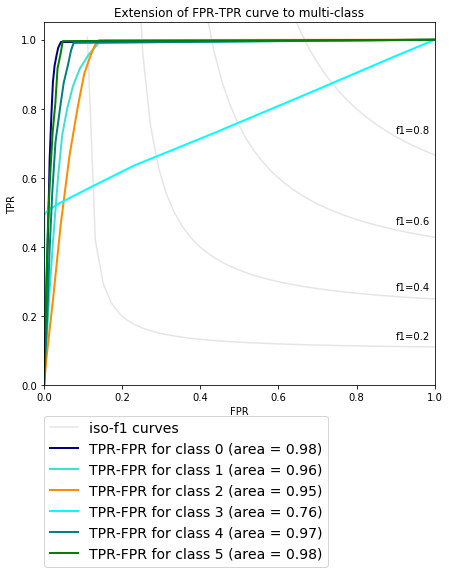

None


In [12]:
print('Score for the 50k + 290 original Dataset:')
reg_score = bagging_classifier(X1, Y ,x1_train, y1_train, x1_test, y1_test)
